<a href="https://colab.research.google.com/github/kemaldoguoktay/Music-Survey-Analysis/blob/main/music_survey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
# imported libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
!pip install googletrans==4.0.0-rc1
from googletrans import Translator
import itertools
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
from plotnine import *
from plotnine.data import *
%matplotlib inline

In [113]:
# read csv

df = pd.read_csv("music_survey_365.csv")
df.head(1)

,Zaman damgası,What is your gender?,What is your department?,What year are you in school?,What are your favorite music types? (Select up to 3),What types of places do you prefer for spending your leisure time? (Select up to 2),How often do you listen to music?,How often do you discuss or debate music with friends?,Do you feel comfortable sharing your music preferences with others?,Do you feel the music you listen to reflects who you are?,Do you think discussing or debating songs helps you socialize?,How social do you consider yourself?,Do you prefer listening to music while studying?,How often do you attend concerts or live music events?,How important are lyrics to you when listening to music?,Has there been a turning point in your life that changed your music listening frequency or genre preference?
0,2024/12/08 8:02:46 ÖS GMT+3,Male,Faculty of Arts and Sciences,5th year or more,Pop;Rock;Metal,Home/Dormitory;Cafes,5,2,5,3,1,3,3,2,4,During a period of my life where I felt alone ...


In [114]:
# changed column names and zaman is droped

new_column_names = ["Zaman", "gender", "dep", "thyear", "fav_type",
                    "leis_time", "listen_freq", "debate_freq", "is_comf_sharing",
                    "is_reflect_you", "is_debate_socialize", "how_social", "prefer_listen_studying",
                    "attend_concert_freq", "how_imp_lyrics","turning_point"]

df.columns = new_column_names

df = df.drop(columns=["Zaman"])

df.head(0)

,gender,dep,thyear,fav_type,leis_time,listen_freq,debate_freq,is_comf_sharing,is_reflect_you,is_debate_socialize,how_social,prefer_listen_studying,attend_concert_freq,how_imp_lyrics,turning_point


In [115]:
# Checked columns' unique values

for i in df.drop(columns=["turning_point", "fav_type", "leis_time"]).columns:
  print(f" ** {i} **\n\n",df.drop(columns=["turning_point"])[i].unique(),"\n","--"*40)

 ** gender **

 ['Male' 'Other' 'Female' 'Prefer not to say'] 
 --------------------------------------------------------------------------------
 ** dep **

 ['Faculty of Arts and Sciences' 'Faculty of Engineering'
 'Faculty of Economic and Administrative Sciences' 'Faculty of Education'
 'Faculty of Architecture'] 
 --------------------------------------------------------------------------------
 ** thyear **

 ['5th year or more' '3rd year' '4th year' '2nd year' '1st year'
 'Preparatory year'] 
 --------------------------------------------------------------------------------
 ** listen_freq **

 [5 3 4 2 1] 
 --------------------------------------------------------------------------------
 ** debate_freq **

 [2 3 1 5 4] 
 --------------------------------------------------------------------------------
 ** is_comf_sharing **

 [5 4 3 2 1] 
 --------------------------------------------------------------------------------
 ** is_reflect_you **

 [3 4 5 2 1] 
 --------------------------

In [116]:
# changed dep answers

df['dep'] = df['dep'].str.replace('Faculty of ', '')
df['thyear'] = df['thyear'].str.replace('5th', '6th')
df['thyear'] = df['thyear'].str.replace('4th', '5th')
df['thyear'] = df['thyear'].str.replace('3rd', '4th')
df['thyear'] = df['thyear'].str.replace('2nd', '3rd')
df['thyear'] = df['thyear'].str.replace('1st', '2nd')
df['thyear'] = df['thyear'].str.replace('Preparatory', '1st')

In [117]:
df.dep.unique()

array(['Arts and Sciences', 'Engineering',
       'Economic and Administrative Sciences', 'Education',
       'Architecture'], dtype=object)

In [118]:
df.thyear.unique()

array(['6th year or more', '4th year', '5th year', '3rd year', '2nd year',
       '1st year'], dtype=object)

In [119]:
df['fav_type'] = df['fav_type'].str.replace(',', ';')

In [120]:
# In the question i asked to choice up to 3 but someones selected more than 3
# Hence i randomly selected answers up to 3

def random_selection(value):
    genres = value.split(';')

    if len(genres) > 3:
        keep_indices = random.sample(range(len(genres)), 3)
        genres = [genres[i] for i in keep_indices]

    return ';'.join(genres)

df['fav_type'] = df['fav_type'].apply(random_selection)

In [121]:
# There was a problem about the last and first words.
# I drop the semicolons which is at the end or at the start

def remove_leading_semicolon(text):
  if text.startswith(';'):
    return text[1:]
  if text.endswith(';'):
    return text[:-1]
  else:
    return text


df['fav_type'] = df['fav_type'].apply(remove_leading_semicolon)

In [122]:
# I observed there is a problem about paranthesis and i want to see where it is

df[df['fav_type'].str.contains('\\(', na=False)]

,gender,dep,thyear,fav_type,leis_time,listen_freq,debate_freq,is_comf_sharing,is_reflect_you,is_debate_socialize,how_social,prefer_listen_studying,attend_concert_freq,how_imp_lyrics,turning_point
134,Female,Arts and Sciences,6th year or more,Meditative sounds; icaros (medicine songs ) ; ...,Home/Dormitory;Parks/Nature,4,2,1,5,1,2,1,1,4,"Yes , emotional and spritual-mystical stuff ch..."
247,Female,Arts and Sciences,2nd year,Arabesque;South Asian Classical (Ghazal; Qawaa...,Cafes;Beaches/Coastal Areas,5,3,5,5,4,3,5,4,5,No


In [123]:
# Unique problem fixed.

df.iloc[247, df.columns.get_loc('fav_type')] = 'Qawaali;South Asian Classical;Pop'

df['fav_type'].iloc[[247]]

,fav_type
247,Qawaali;South Asian Classical;Pop


In [124]:
# Unique problem fixed.

df.iloc[134, df.columns.get_loc('fav_type')] = 'Meditative Sounds;Icaro;Tibetian Chants'

df['fav_type'].iloc[[134]]

,fav_type
134,Meditative Sounds;Icaro;Tibetian Chants


In [125]:
# See the df

df.head(3)

,gender,dep,thyear,fav_type,leis_time,listen_freq,debate_freq,is_comf_sharing,is_reflect_you,is_debate_socialize,how_social,prefer_listen_studying,attend_concert_freq,how_imp_lyrics,turning_point
0,Male,Arts and Sciences,6th year or more,Pop;Rock;Metal,Home/Dormitory;Cafes,5,2,5,3,1,3,3,2,4,During a period of my life where I felt alone ...
1,Male,Arts and Sciences,4th year,Rock;Rap;Electronic,Cafes;Sport/Walking Around,5,3,4,4,4,5,5,4,4,No
2,Male,Arts and Sciences,5th year,Rock;Metal,Home/Dormitory;Parks/Nature,5,3,5,4,5,2,1,2,3,No


In [126]:
# In the question i asked to choice up to 2 but someones selected more than 2
# Hence i randomly selected answers up to 2

def random_select(value):
    genres = value.split(';')

    if len(genres) > 2:
        keep_indices = random.sample(range(len(genres)), 2)
        genres = [genres[i] for i in keep_indices]

    return ';'.join(genres)

df['leis_time'] = df['leis_time'].apply(random_select)

In [127]:
# removed semicolons at the end or start

df['leis_time'] = df['leis_time'].apply(remove_leading_semicolon)

In [128]:
# see data types

df.dtypes

,0
gender,object
dep,object
thyear,object
fav_type,object
leis_time,object
listen_freq,int64
debate_freq,int64
is_comf_sharing,int64
is_reflect_you,int64
is_debate_socialize,int64


In [129]:
# I turned into answers to lower letters

for column in ['leis_time', 'fav_type', 'dep','gender', 'thyear', 'turning_point']:
    df[column] = df[column].str.lower()

In [130]:
# see df again

df.head(3)

,gender,dep,thyear,fav_type,leis_time,listen_freq,debate_freq,is_comf_sharing,is_reflect_you,is_debate_socialize,how_social,prefer_listen_studying,attend_concert_freq,how_imp_lyrics,turning_point
0,male,arts and sciences,6th year or more,pop;rock;metal,home/dormitory;cafes,5,2,5,3,1,3,3,2,4,during a period of my life where i felt alone ...
1,male,arts and sciences,4th year,rock;rap;electronic,cafes;sport/walking around,5,3,4,4,4,5,5,4,4,no
2,male,arts and sciences,5th year,rock;metal,home/dormitory;parks/nature,5,3,5,4,5,2,1,2,3,no


In [131]:
# unique error detected and fixed

df[df['fav_type'].str.contains('funk', na=False)]

df.iloc[262, df.columns.get_loc('fav_type')] = 'rock;funk;punk'

In [132]:
# unique error detected and fixed

df[df['fav_type'].str.contains('indie', na=False)]

df.iloc[73, df.columns.get_loc('fav_type')] = 'rock;rap;indie'

In [133]:
# unique error detected and fixed

df[df['fav_type'].str.contains('kpop', na=False)]

df.iloc[408, df.columns.get_loc('fav_type')] = 'kpop;jpop;soundtrack'

In [134]:
# unique error detected and fixed

df[df['fav_type'].str.contains('funk', na=False)]

df.iloc[209, df.columns.get_loc('fav_type')] = 'rock;metal;funk'
df.iloc[262, df.columns.get_loc('fav_type')] = 'rock;funk;punk'

In [135]:
# unique error detected and fixed

df[df['fav_type'].str.contains('k-pop', na=False)]

df.iloc[36, df.columns.get_loc('fav_type')] = 'r&b;kpop;classical'

In [136]:
# unique error detected and fixed

all_genres = df['fav_type'].str.split(';').explode()
all_genres = all_genres[all_genres.str.strip().astype(bool)]

In [137]:
# see df's fav_type columns

all_genres

,fav_type
0,pop
0,rock
0,metal
1,rock
1,rap
...,...
417,jazz
417,medieval folk music
418,jazz
418,classical


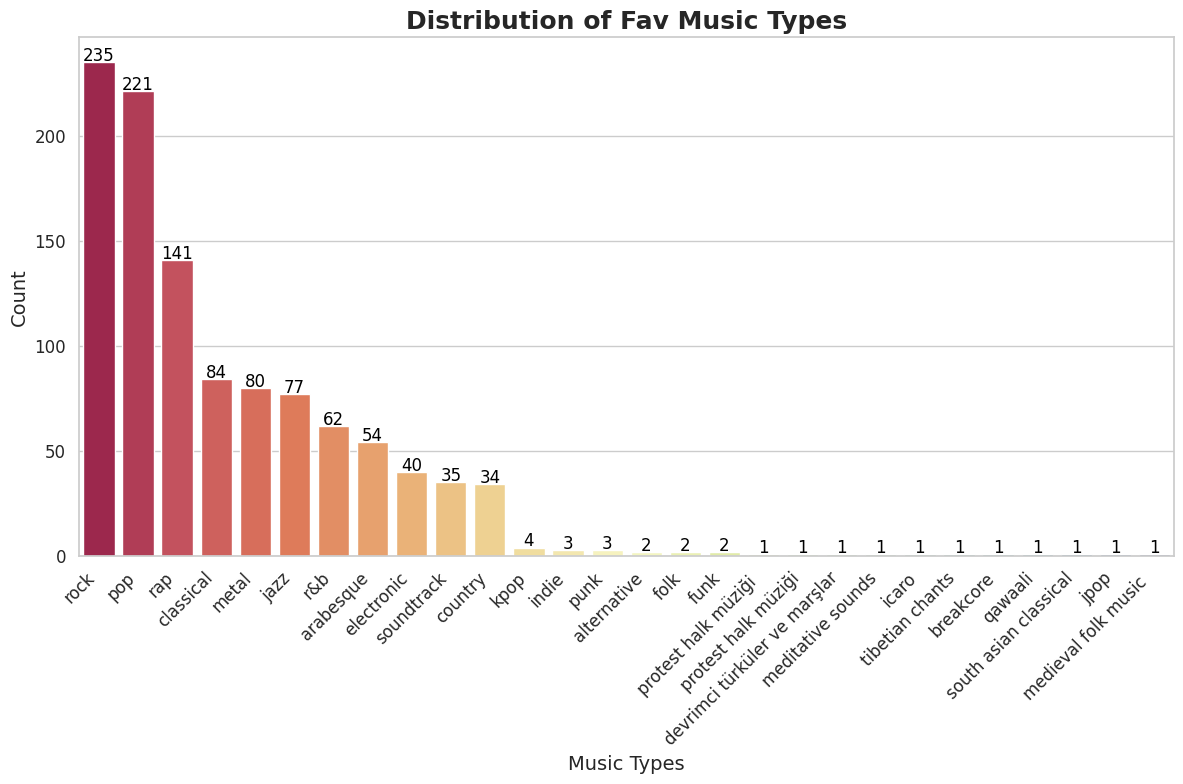

In [138]:
# Fav Music Types Distribution graph created

sns.set_theme(style="whitegrid")

exploded = all_genres
counts = exploded.value_counts()

plt.figure(figsize=(12, 8))
colors = sns.color_palette("Spectral", len(counts))
bars = sns.barplot(x=counts.index, y=counts.values, palette=colors)

for bar, count in zip(bars.patches, counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{count}', ha='center', fontsize=12, color='black')

plt.xlabel("Music Types", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Fav Music Types", fontsize=18, fontweight="bold")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

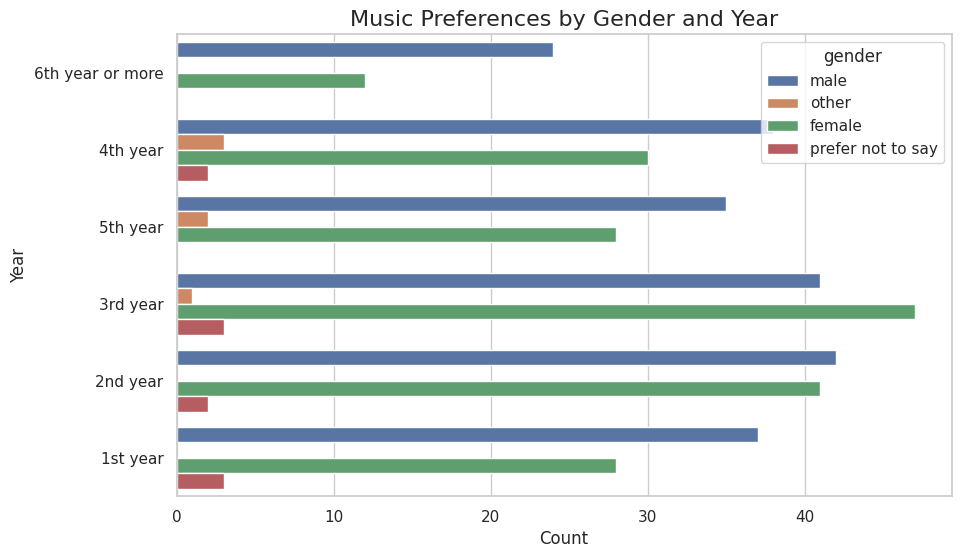

In [139]:
# Music preferences by gender and year graph created

plt.figure(figsize=(10, 6))
sns.countplot(y='thyear', hue='gender', data=df)
plt.title('Music Preferences by Gender and Year', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

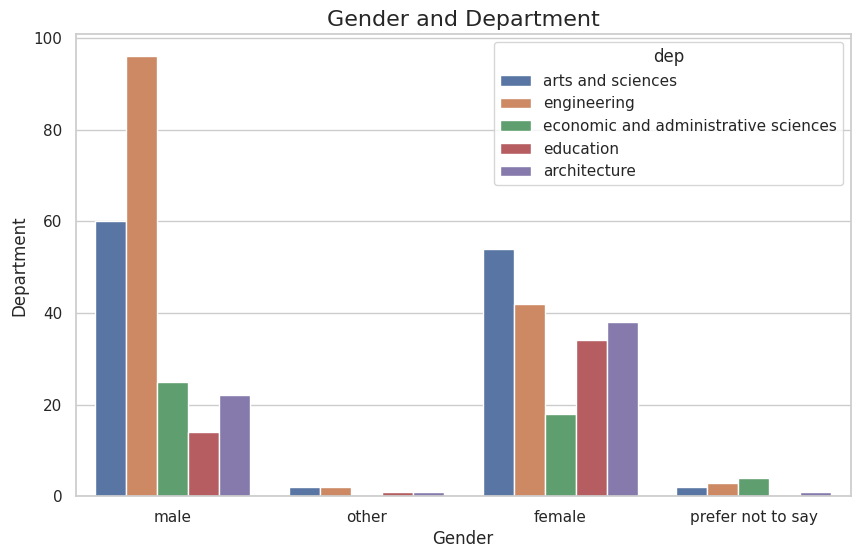

In [140]:
# graph created

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='dep', data=df)
plt.title('Gender and Department', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Department')
plt.show()

In [141]:
# I translated the answers to english

translator = Translator()
def translate_to_english(text):
  """Translates text to English using googletrans."""
  try:
    translated = translator.translate(text, dest='en').text
    return translated
  except Exception as e:
    print(f"Translation error: {e}")
    return text  # Return original text if translation fails

df['translated_turning_point'] = df['turning_point'].apply(translate_to_english)
df['trans_leis_time'] = df['leis_time'].apply(translate_to_english)

In [142]:
# unique error detected and solved

df[df['translated_turning_point'].str.contains("highschool", na=False, case=False)]

,gender,dep,thyear,fav_type,leis_time,listen_freq,debate_freq,is_comf_sharing,is_reflect_you,is_debate_socialize,how_social,prefer_listen_studying,attend_concert_freq,how_imp_lyrics,turning_point,translated_turning_point,trans_leis_time
108,male,economic and administrative sciences,3rd year,pop;rock;rap,home/dormitory;cafes,5,4,5,5,3,3,2,3,4,in highschool when i listen more the strokes a...,in highschool when i listen more the strokes a...,home/dormitory;cafes
124,male,arts and sciences,2nd year,jazz,home/dormitory,4,2,3,4,3,3,4,2,3,"yes, at the beginning of highschool, my piano ...","yes, at the beginning of highschool, my piano ...",home/dormitory
136,male,arts and sciences,5th year,rock;jazz,home/dormitory;parks/nature,4,3,2,4,4,4,4,3,5,attending highschool,attending highschool,home/dormitory;parks/nature
178,male,arts and sciences,3rd year,classical;jazz;pop,sport/walking around;library,4,2,3,2,3,3,4,4,4,my music taste and frequency was changed at my...,my music taste and frequency was changed at my...,sport/walking around;library


In [143]:
# unique errors detected and solved

df.iloc[108, df.columns.get_loc('translated_turning_point')] = 'in high school when i listen more the strokes and indir genre it felt like i might live better life and different future'
df.iloc[124, df.columns.get_loc('translated_turning_point')] = 'yes, at the beginning of high school, my piano teacher introduced me to jazz and classical music'
df.iloc[136, df.columns.get_loc('translated_turning_point')] = 'attending high school'
df.iloc[178, df.columns.get_loc('translated_turning_point')] = 'my music taste and frequency was changed at my last year in the high school'

In [144]:
# unique errors solving checked

df["translated_turning_point"].iloc[108]
df["translated_turning_point"].iloc[124]
df["translated_turning_point"].iloc[136]
df["translated_turning_point"].iloc[178]

'my music taste and frequency was changed at my last year in the high school'

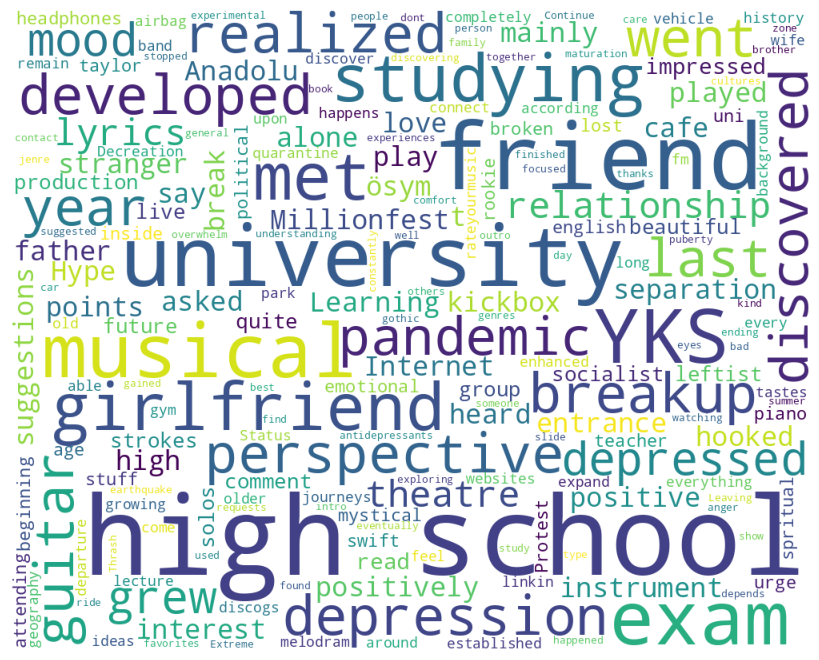

In [145]:
# wordcloud created

text = " ".join(str(i) for i in df['translated_turning_point'].dropna())

stopwords = set(STOPWORDS)
stopwords.update(["much","better","less","increased","taste","pink","turkish","playing","many","wanted","metallica","called","goes","artist","radiohead","anymore","opened","floyd","effects","aboyt","might","still","affected","Kajmer","Sagopa","pop","listened","arabesque","funk","preferences","jazz","classical","important","sometimes","preferred","didn","ve","m","point","turning","changes","really","first","though","felt","start","made","Sancak","thought","indir","becoming","got","rock","metal","rap","new","good","change","turned","months","introduced","became","periods","one","lot","even","senem","named","favorite","frequently","frequency","different","time","period","nan", "NaN", "listen", "music", "now", "preference", "listening", "genre","changed", "yes", "started", "life", "song","songs"])


wordcloud = WordCloud(width=1000, height=800, background_color="white", stopwords=stopwords, min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [146]:
# new version of csv saved

df.to_csv("music_survey_processed.csv", index=False)

In [147]:
# see df columns

df.columns

Index(['gender', 'dep', 'thyear', 'fav_type', 'leis_time', 'listen_freq',
       'debate_freq', 'is_comf_sharing', 'is_reflect_you',
       'is_debate_socialize', 'how_social', 'prefer_listen_studying',
       'attend_concert_freq', 'how_imp_lyrics', 'turning_point',
       'translated_turning_point', 'trans_leis_time'],
      dtype='object')

In [148]:
# heatmap task created for a lot of columns

import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_hm = df.copy()
df_hm = df_hm.drop(columns = ["fav_type","leis_time",'turning_point','translated_turning_point', 'trans_leis_time'])

le = LabelEncoder()

df_hm['thyear'] = le.fit_transform(df_hm['thyear'])
df_hm['dep'] = le.fit_transform(df_hm['dep'])
df_hm['gender'] = le.fit_transform(df_hm['gender'])

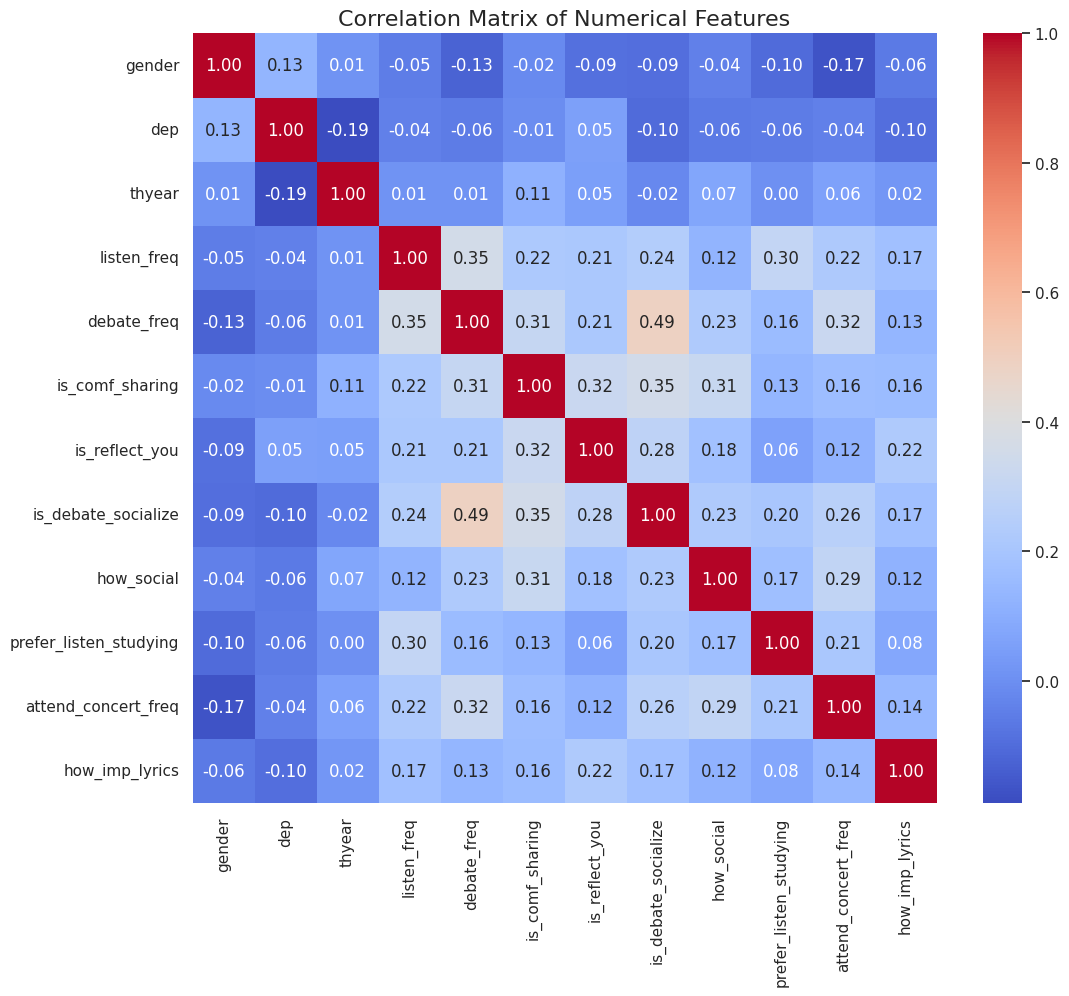

In [149]:
# heatmap created

plt.figure(figsize=(12, 10))
correlation_matrix = df_hm.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [150]:
# index created by myself which shows "How much are you music person"

df['xMP'] = np.log2((df['listen_freq']**4.2)+(df['debate_freq']**3.7)+(df["prefer_listen_studying"]**3.5)+(df["attend_concert_freq"]**4)+(df["is_comf_sharing"]**2)+(df["is_reflect_you"]**2.7))

In [151]:
# xMP results by sorted

df["xMP"].sort_values(ascending=False)

,xMP
176,11.138665
147,11.138665
175,11.138665
164,11.138665
33,11.138665
...,...
215,6.017882
364,6.016335
216,5.902030
222,5.887207


In [152]:
# see df

df.head(8)

,gender,dep,thyear,fav_type,leis_time,listen_freq,debate_freq,is_comf_sharing,is_reflect_you,is_debate_socialize,how_social,prefer_listen_studying,attend_concert_freq,how_imp_lyrics,turning_point,translated_turning_point,trans_leis_time,xMP
0,male,arts and sciences,6th year or more,pop;rock;metal,home/dormitory;cafes,5,2,5,3,1,3,3,2,4,during a period of my life where i felt alone ...,during a period of my life where i felt alone ...,home/dormitory;cafes,9.940330
1,male,arts and sciences,4th year,rock;rap;electronic,cafes;sport/walking around,5,3,4,4,4,5,5,4,4,no,no,cafes;sport/walking around,10.564455
2,male,arts and sciences,5th year,rock;metal,home/dormitory;parks/nature,5,3,5,4,5,2,1,2,3,no,no,home/dormitory;parks/nature,9.972710
3,male,engineering,4th year,pop;rock;rap,library;sport/walking around,3,1,3,4,2,4,1,1,2,no,no,library;sport/walking around,7.277320
4,male,arts and sciences,4th year,classical;metal;soundtrack,home/dormitory;cafes,4,3,2,5,1,3,1,1,1,yks sınav senem,YKS Exam Senem,home/dormitory;cafes,8.904425
5,male,engineering,3rd year,electronic;classical;soundtrack,home/dormitory;my department studyroom,5,2,5,5,5,5,5,1,3,when i started playing classical music myself,when i started playing classical music myself,home/dormitory;my department studyroom,10.296876
6,male,arts and sciences,6th year or more,pop;rock;classical,home/dormitory;sport/walking around,5,3,4,5,2,3,4,2,5,i̇lk kez milyonfest e gidene kadar sadece yaba...,I was just listening to stranger until I went ...,home/dormitory;sport/walking around,10.177067
7,other,arts and sciences,5th year,classical;jazz;electronic,sport/walking around;cafes,4,2,3,3,4,4,5,3,4,more than one turning points,more than one turning points,sport/walking around;cafes,9.530831


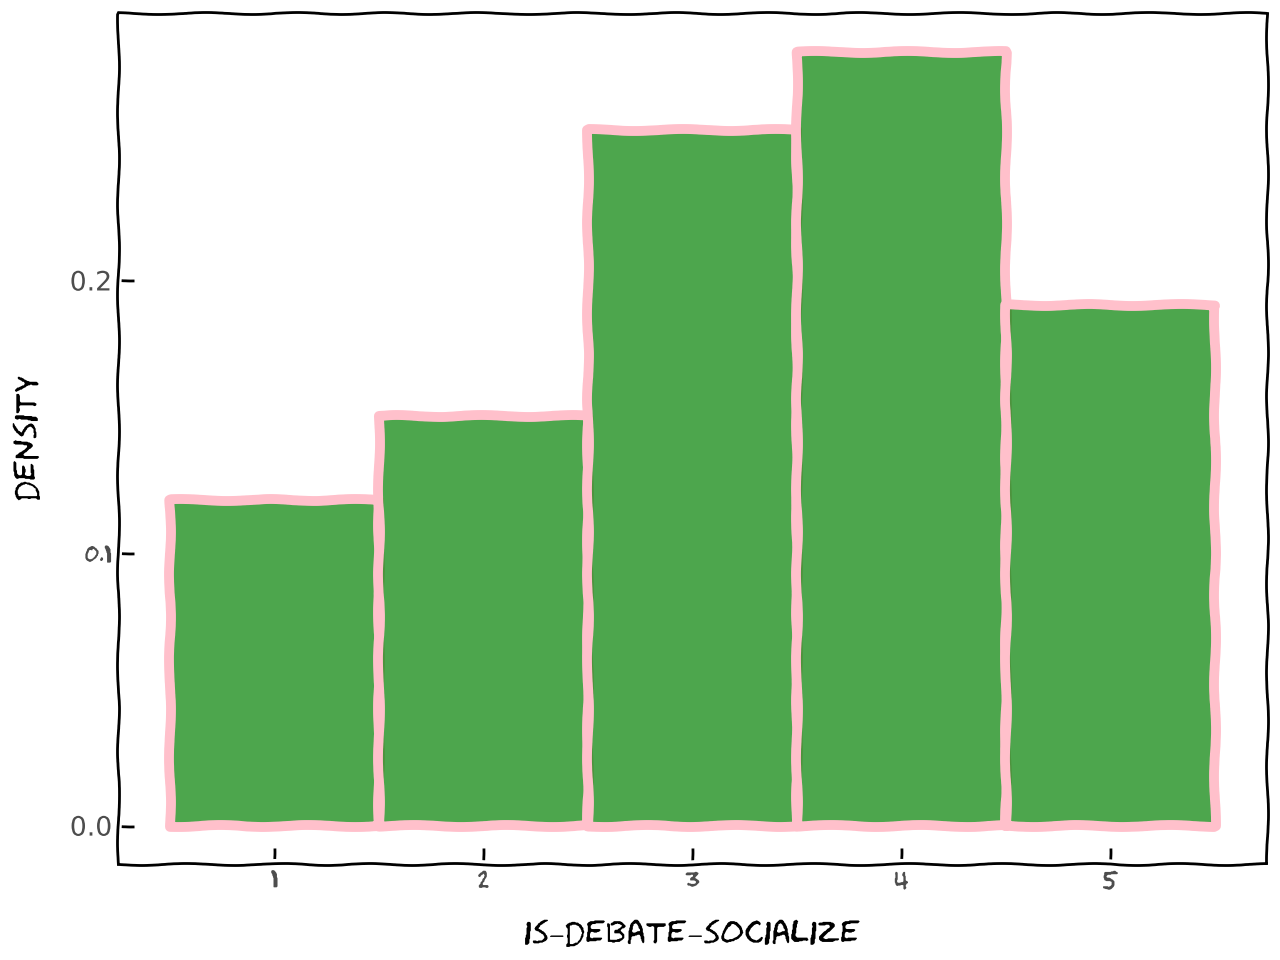

In [153]:
# sweet graph created


(
    ggplot(df, aes(x='is_debate_socialize', y=after_stat('density')))
    + geom_histogram(binwidth=1,
                    fill='green',
                    colour='pink',
                    size=2,
                    alpha=0.7
                    )
    + theme_xkcd()
)

In [154]:
# new df variable created

df_rm_other = df.copy()

values_to_remove = ["prefer not to say", "other"]

filtered_df = df_rm_other[~df_rm_other["gender"].isin(values_to_remove)]

df_rm_other = filtered_df

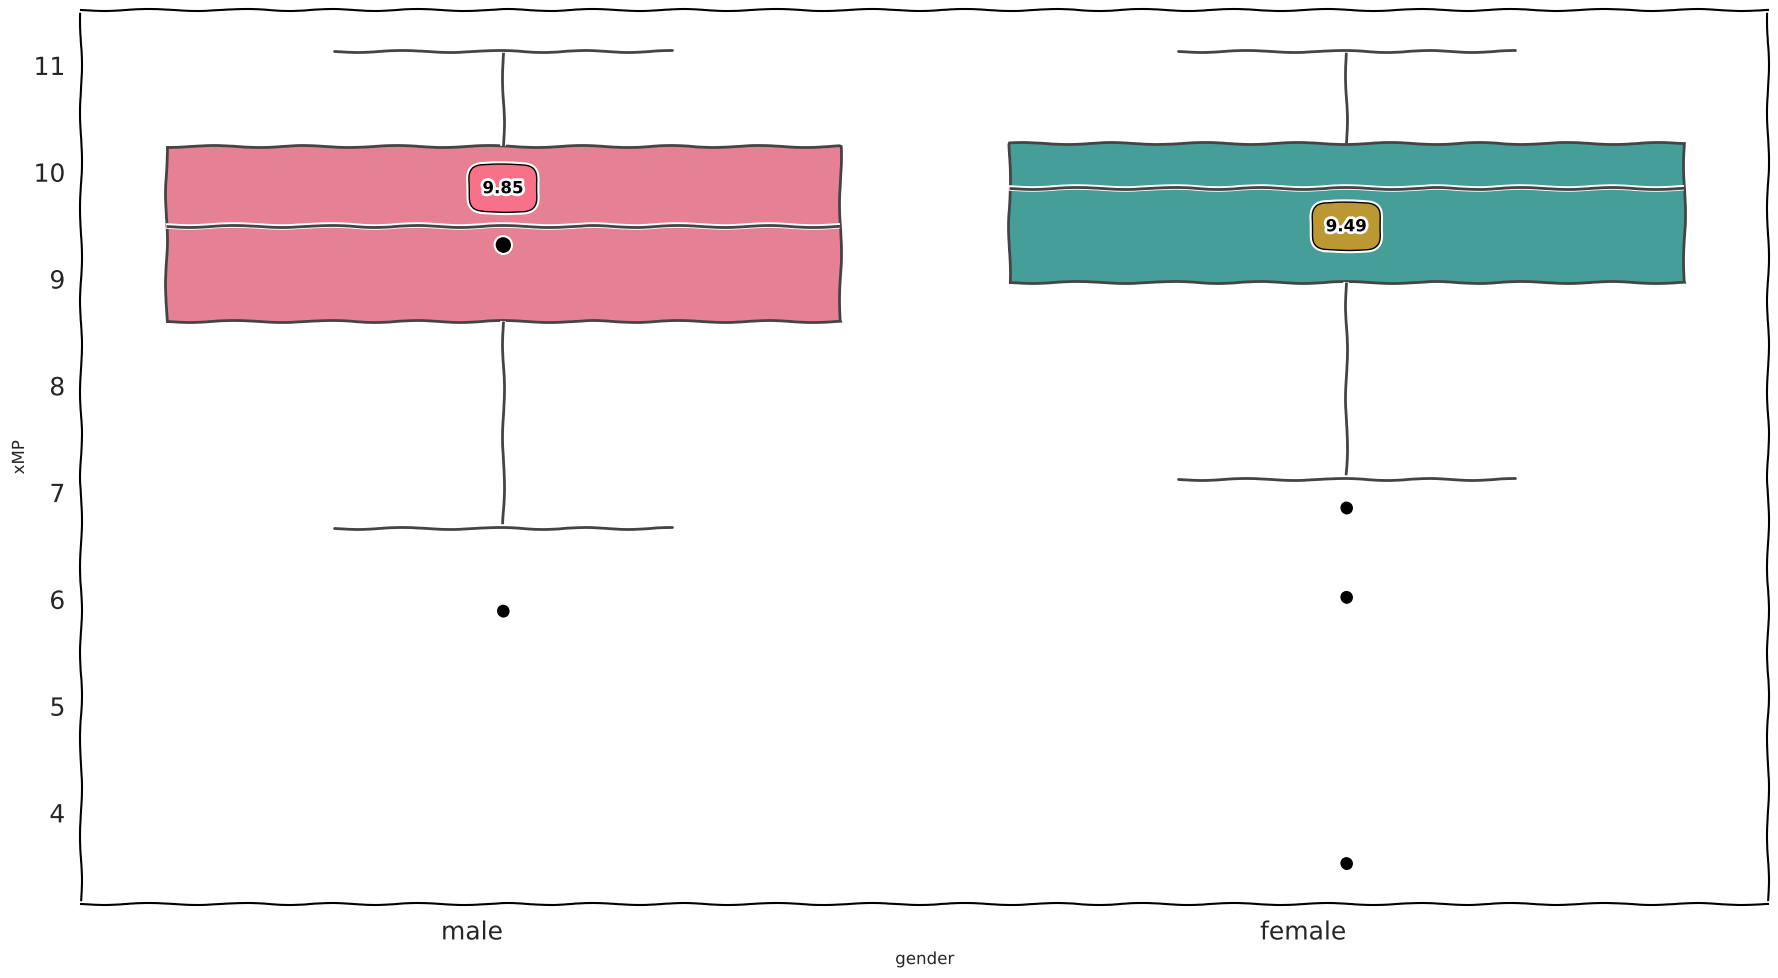

In [155]:
# sweet graph created

with plt.xkcd():
    plt.rcParams['lines.dash_capstyle'] = 'butt'

    fig, ax = plt.subplots(figsize=(18, 10))

    order = ["1st year", "2nd year", "3rd year", "4th year", "5th year", "6th year or more"]
    palette = sns.color_palette("husl", len(order))


    flierprops = {
        'marker': 'o',
        'markerfacecolor': 'black',
        'markeredgecolor': 'black',
        'markersize': 8,
        'linestyle': 'none'
    }


    sns.boxplot(data=df_rm_other, x='gender', y='xMP', ax=ax,
                palette="husl",
                linewidth=2,
                showmeans=True,
                flierprops=flierprops,
                fliersize=8,
                meanprops={"marker": "o",
                           "markerfacecolor": "black",
                           "markeredgecolor": "black",
                           "markersize": "10"})


    medians = df_rm_other.groupby('gender')['xMP'].median()
    for i, median in enumerate(medians):
        ax.text(i, median, f'{median:.2f}', ha='center', va='center',
                color='black', fontsize=12, fontweight='bold',
                bbox=dict(facecolor=palette[i], edgecolor='black', boxstyle='round,pad=0.85'))

    plt.xticks(rotation=0, ha='right', fontsize=18)
    plt.yticks(rotation=0, ha='right', fontsize=18)

    plt.tight_layout()
    plt.show()

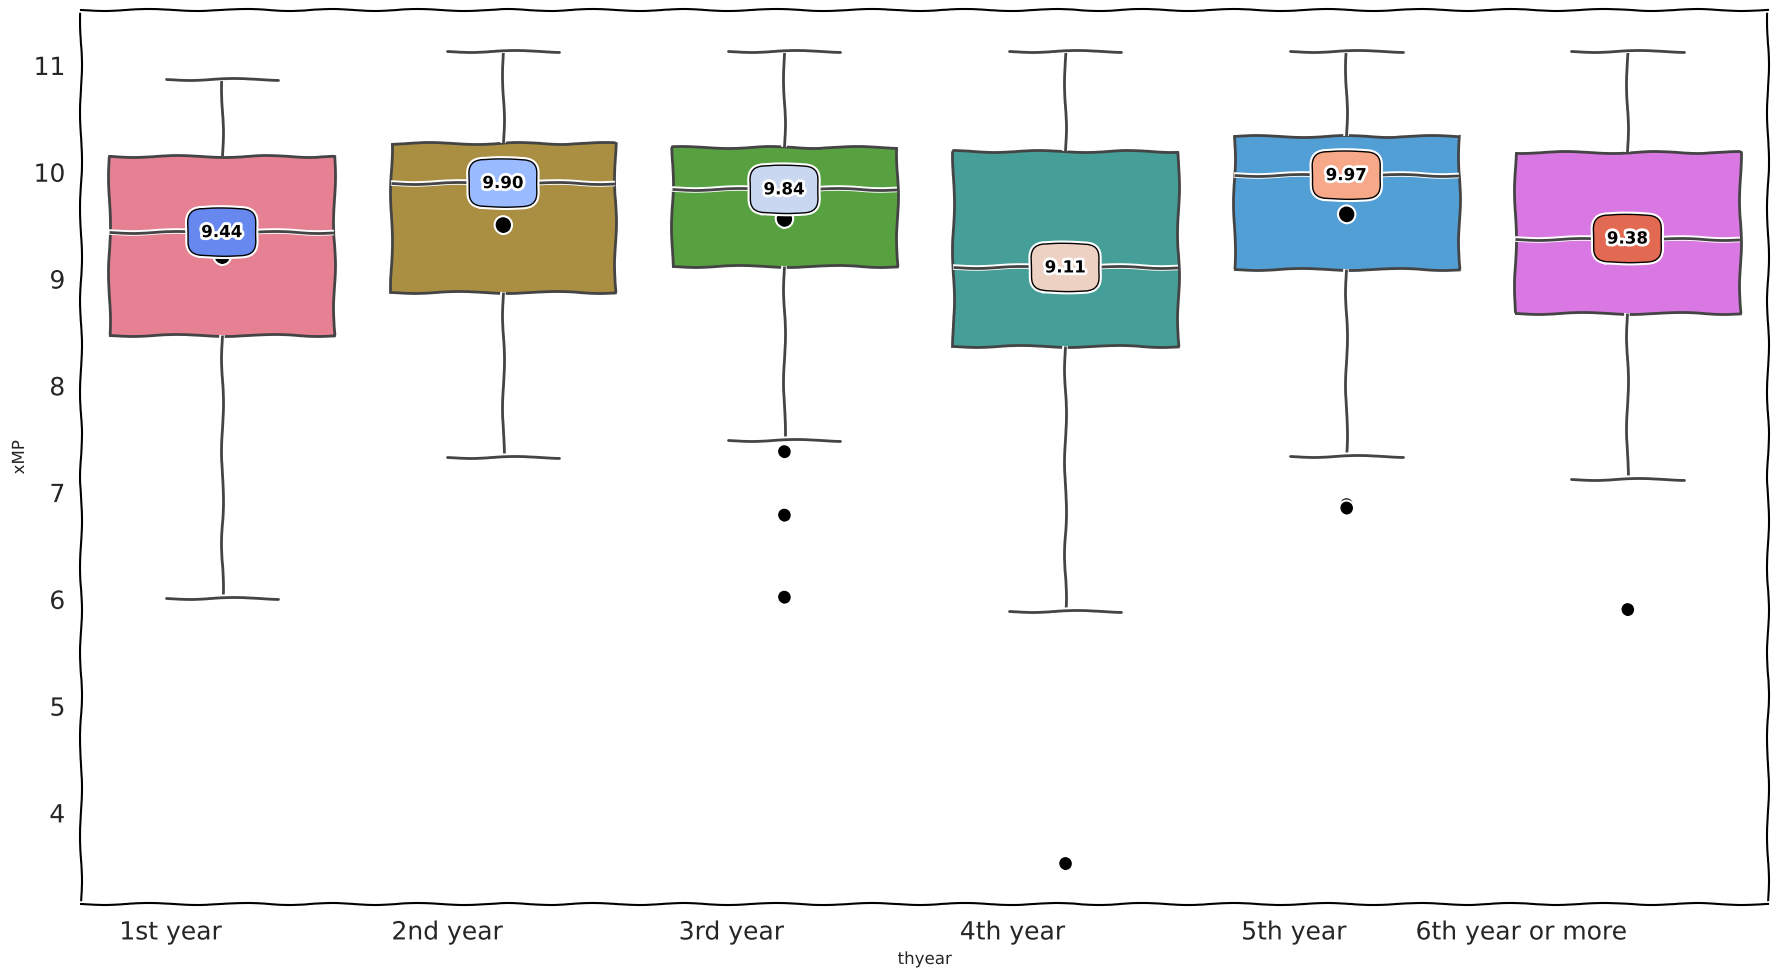

In [156]:
with plt.xkcd():

    plt.rcParams['lines.dash_capstyle'] = 'butt'

    fig, ax = plt.subplots(figsize=(18, 10))


    order = ["1st year", "2nd year", "3rd year", "4th year", "5th year", "6th year or more"]
    palette = sns.color_palette("coolwarm", len(order))


    flierprops = {
        'marker': 'o',
        'markerfacecolor': 'black',
        'markeredgecolor': 'black',
        'markersize': 8,
        'linestyle': 'none'
    }


    sns.boxplot(data=df, x='thyear', y='xMP', ax=ax,
                order=order,
                palette="husl",
                linewidth=2,
                showmeans=True,
                flierprops=flierprops,
                fliersize=8,
                meanprops={"marker": "o",
                           "markerfacecolor": "black",
                           "markeredgecolor": "black",
                           "markersize": "10"})

    medians = df.groupby('thyear')['xMP'].median()
    for i, median in enumerate(medians):
        ax.text(i, median, f'{median:.2f}', ha='center', va='center',
                color='black', fontsize=12, fontweight='bold',
                bbox=dict(facecolor=palette[i], edgecolor='black', boxstyle='round,pad=0.85'))

    plt.xticks(rotation=0, ha='right', fontsize=18)
    plt.yticks(rotation=0, ha='right', fontsize=18)

    plt.tight_layout()
    plt.show()


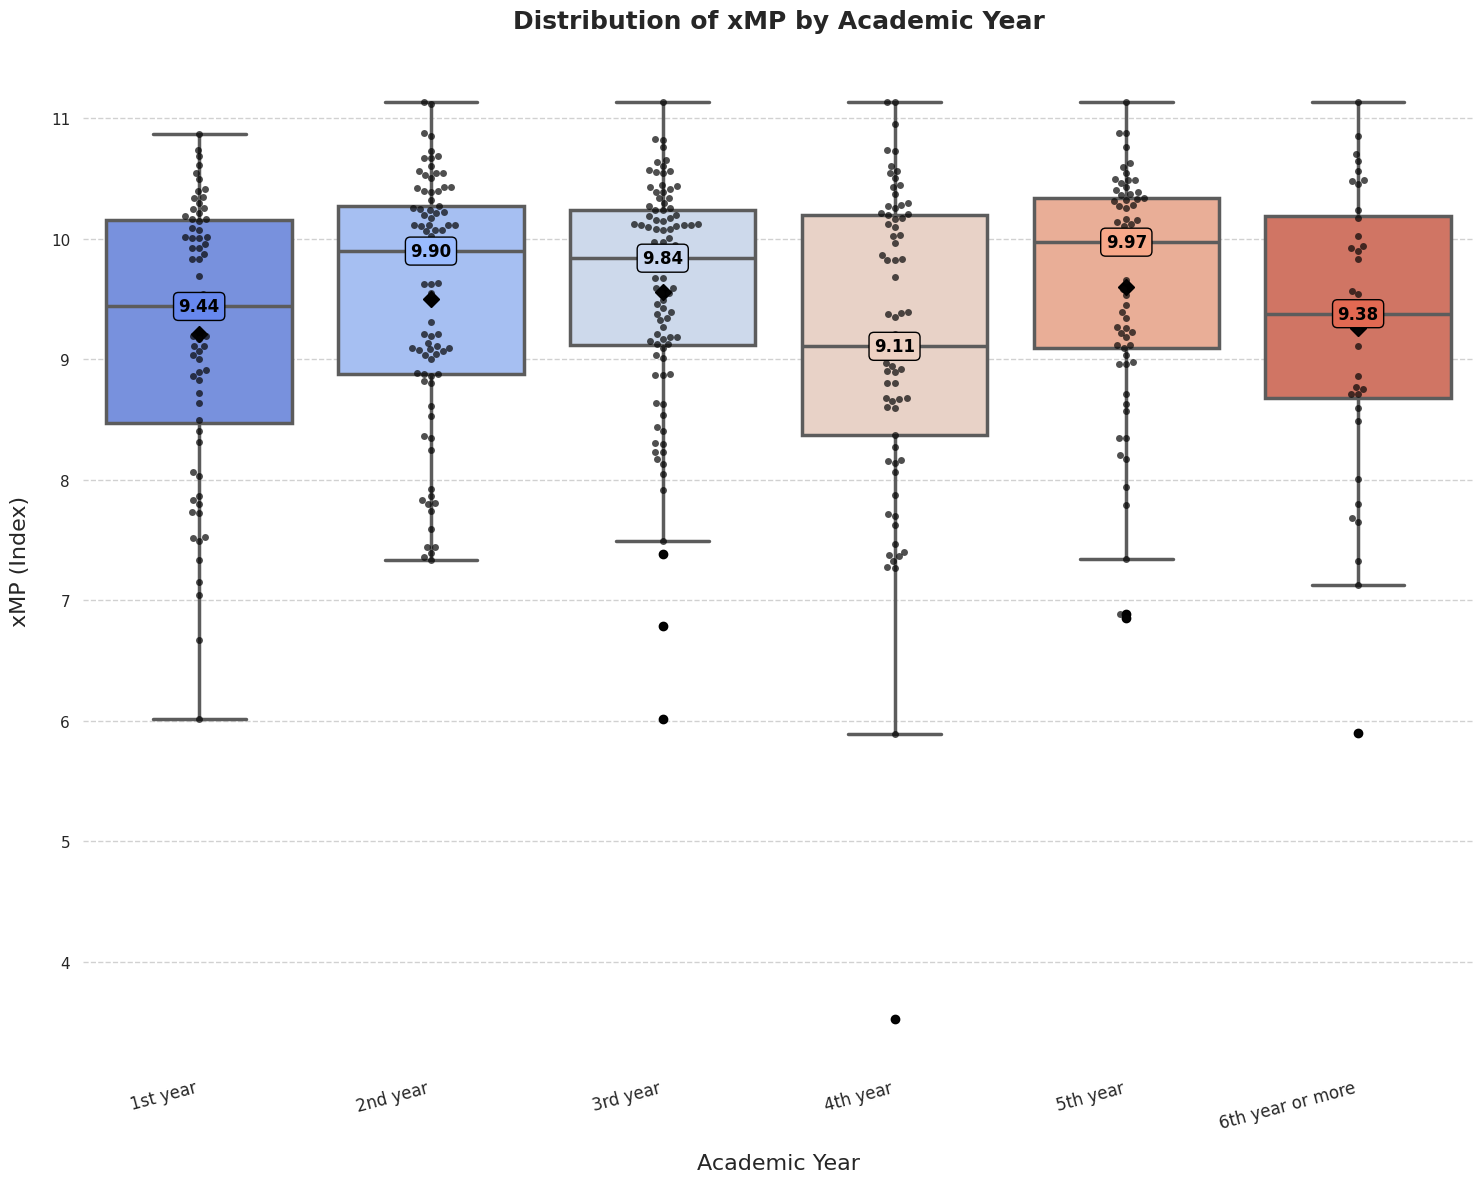

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))


order = ["1st year", "2nd year", "3rd year", "4th year", "5th year", "6th year or more"]
palette = sns.color_palette("coolwarm", len(order))

flierprops = {
    'marker': 'o',
    'markerfacecolor': 'black',
    'markeredgecolor': 'black',
    'markersize': 6,
    'linestyle': 'none'
}


sns.boxplot(data=df, x='thyear', y='xMP', ax=ax,
            order=order,
            palette=palette,
            linewidth=2.5,
            fliersize=8,
            showmeans=True,
            flierprops=flierprops,
            meanprops={
                "marker": "D",
                "markerfacecolor": "black",
                "markeredgecolor": "black",
                "markersize": 8
            })


sns.swarmplot(data=df, x='thyear', y='xMP', ax=ax,
              order=order,
              color="0.02",
              size=5,
              alpha=0.7)


ax.set_xlabel("Academic Year", fontsize=16, labelpad=15)
ax.set_ylabel("xMP (Index)", fontsize=16, labelpad=15)


ax.set_title("Distribution of xMP by Academic Year", fontsize=18, pad=20, weight='bold')

ax.grid(axis='y', linestyle='--', alpha=0.9)


medians = df.groupby('thyear')['xMP'].median()
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.2f}', ha='center', va='center',
            color='black', fontsize=12, fontweight='bold',
            bbox=dict(facecolor=palette[i], edgecolor='black', boxstyle='round,pad=0.3'))

plt.xticks(rotation=15, ha='right', fontsize=12)


sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


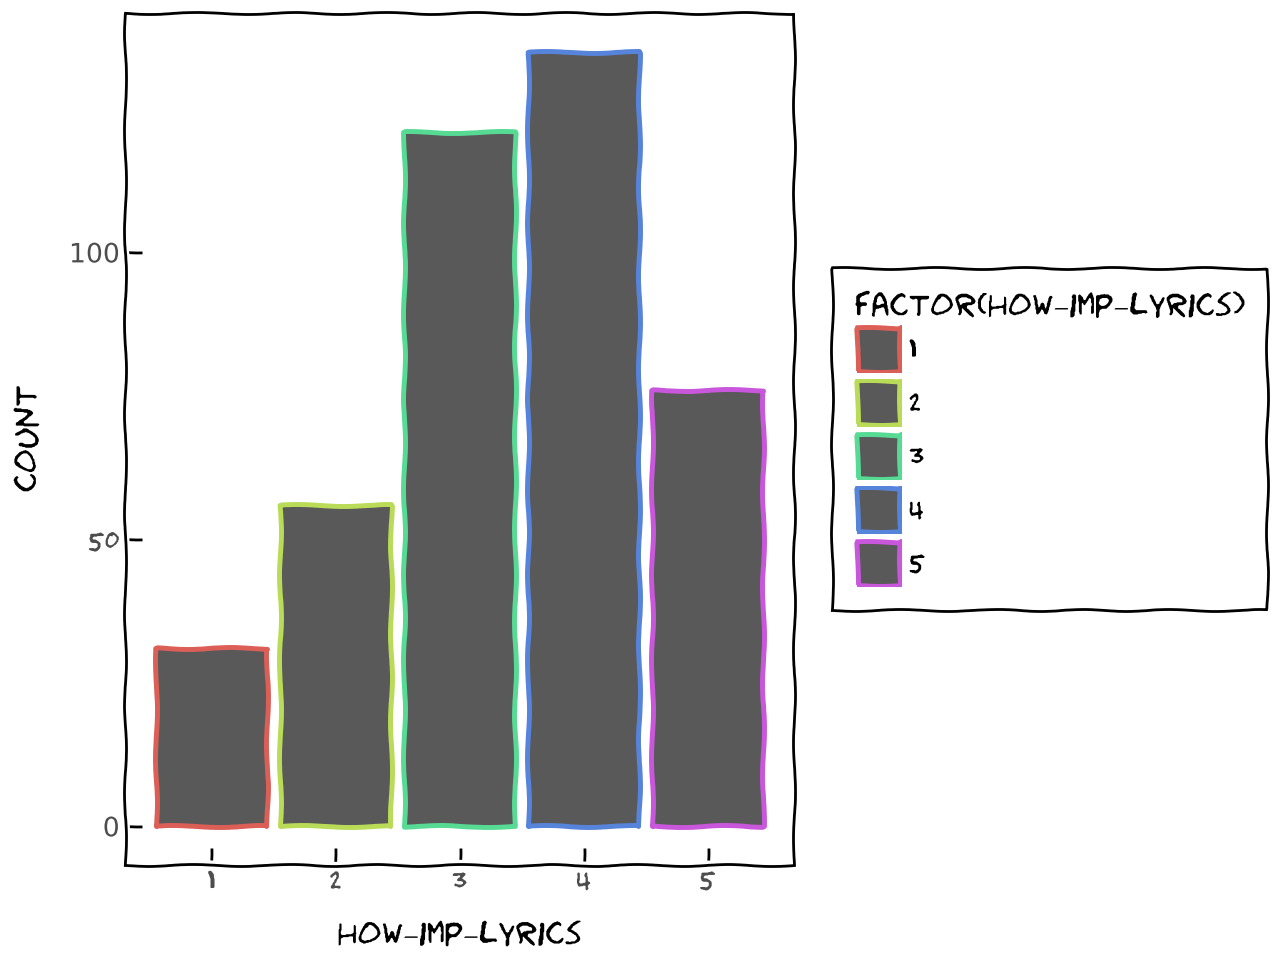

In [158]:
(ggplot(df, aes('how_imp_lyrics', color='factor(how_imp_lyrics)'))
 + geom_bar(size=1)
 + theme_xkcd()

)

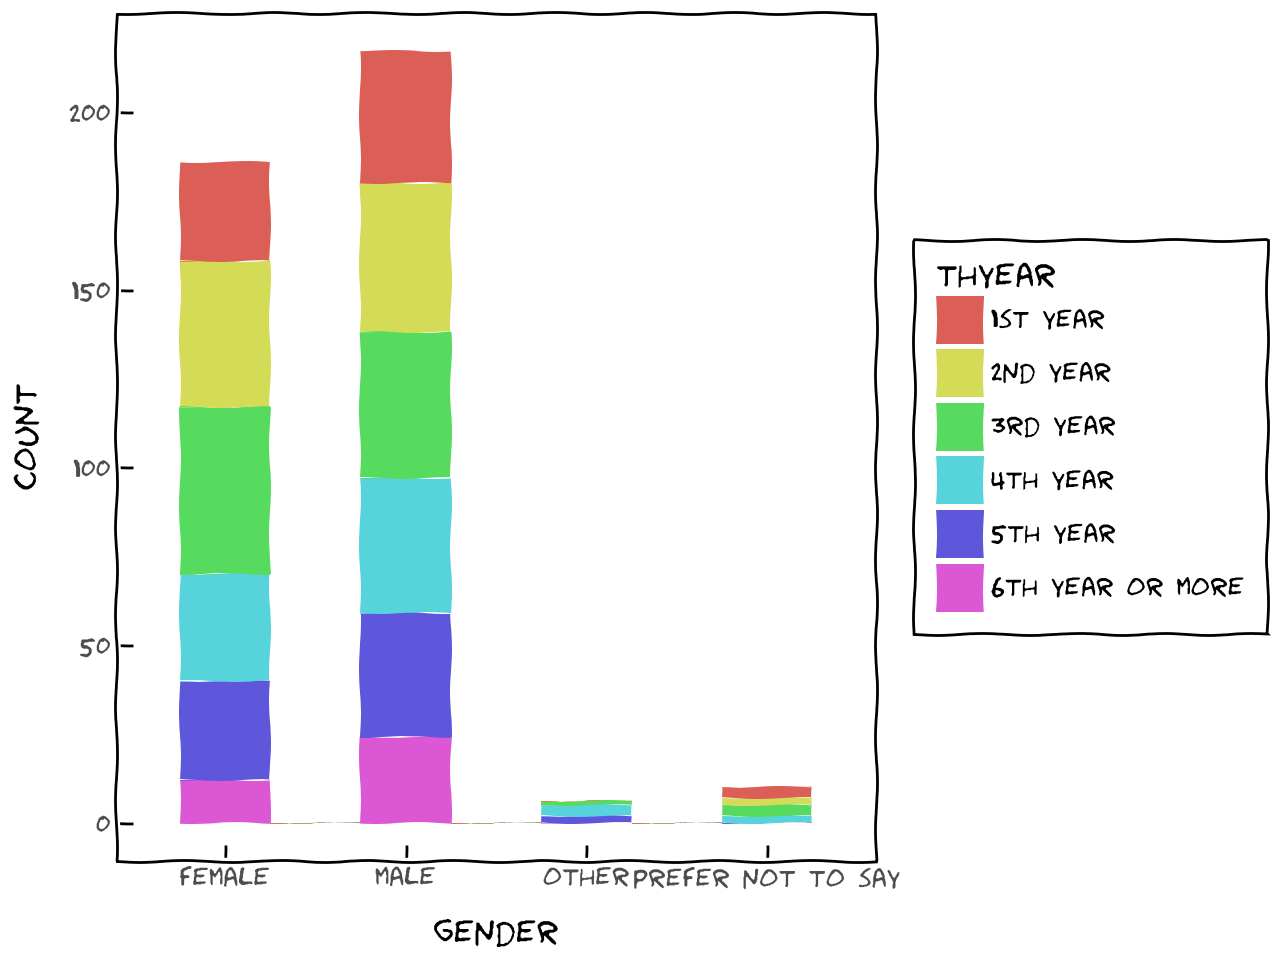

In [159]:
(
    ggplot(df, aes(x='gender', y=after_stat('count'),fill='thyear'))
    + geom_histogram(binwidth=0.5)
    + theme_xkcd()

)

# MACHINE LEARNING PART

In [160]:
# thyear and dep columns are labelencoded

from sklearn.preprocessing import LabelEncoder

df_ml = df.copy()
le = LabelEncoder()

df_ml['thyear'] = le.fit_transform(df_ml['thyear'])
df_ml['dep'] = le.fit_transform(df_ml['dep'])

df_ml.head()

,gender,dep,thyear,fav_type,leis_time,listen_freq,debate_freq,is_comf_sharing,is_reflect_you,is_debate_socialize,how_social,prefer_listen_studying,attend_concert_freq,how_imp_lyrics,turning_point,translated_turning_point,trans_leis_time,xMP
0,male,1,5,pop;rock;metal,home/dormitory;cafes,5,2,5,3,1,3,3,2,4,during a period of my life where i felt alone ...,during a period of my life where i felt alone ...,home/dormitory;cafes,9.940330
1,male,1,3,rock;rap;electronic,cafes;sport/walking around,5,3,4,4,4,5,5,4,4,no,no,cafes;sport/walking around,10.564455
2,male,1,4,rock;metal,home/dormitory;parks/nature,5,3,5,4,5,2,1,2,3,no,no,home/dormitory;parks/nature,9.972710
3,male,4,3,pop;rock;rap,library;sport/walking around,3,1,3,4,2,4,1,1,2,no,no,library;sport/walking around,7.277320
4,male,1,3,classical;metal;soundtrack,home/dormitory;cafes,4,3,2,5,1,3,1,1,1,yks sınav senem,YKS Exam Senem,home/dormitory;cafes,8.904425


In [161]:
# fav_type and leis_time are label encoded
fav_type_unique = set(";".join(df_ml['fav_type']).split(";"))
leis_time_unique = set(";".join(df_ml['leis_time']).split(";"))

le_fav_type = LabelEncoder()
le_leis_time = LabelEncoder()

le_fav_type.fit(list(fav_type_unique))
le_leis_time.fit(list(leis_time_unique))

# turned into numeric values
df_ml['fav_type_encoded'] = df_ml['fav_type'].apply(lambda x: [le_fav_type.transform([cat])[0] for cat in x.split(";")])
df_ml['leis_time_encoded'] = df_ml['leis_time'].apply(lambda x: [le_leis_time.transform([cat])[0] for cat in x.split(";")])

# fav_type and leis_time are exploded
df_exploded = df_ml.explode('fav_type_encoded')
df_ml = df_exploded.explode('leis_time_encoded')

# index reseted
df_ml.reset_index(drop=True, inplace=True)

# result
df_ml.head(10)

,gender,dep,thyear,fav_type,leis_time,listen_freq,debate_freq,is_comf_sharing,is_reflect_you,is_debate_socialize,how_social,prefer_listen_studying,attend_concert_freq,how_imp_lyrics,turning_point,translated_turning_point,trans_leis_time,xMP,fav_type_encoded,leis_time_encoded
0,male,1,5,pop;rock;metal,home/dormitory;cafes,5,2,5,3,1,3,3,2,4,during a period of my life where i felt alone ...,during a period of my life where i felt alone ...,home/dormitory;cafes,9.940330,18,6
1,male,1,5,pop;rock;metal,home/dormitory;cafes,5,2,5,3,1,3,3,2,4,during a period of my life where i felt alone ...,during a period of my life where i felt alone ...,home/dormitory;cafes,9.940330,18,3
2,male,1,5,pop;rock;metal,home/dormitory;cafes,5,2,5,3,1,3,3,2,4,during a period of my life where i felt alone ...,during a period of my life where i felt alone ...,home/dormitory;cafes,9.940330,25,6
3,male,1,5,pop;rock;metal,home/dormitory;cafes,5,2,5,3,1,3,3,2,4,during a period of my life where i felt alone ...,during a period of my life where i felt alone ...,home/dormitory;cafes,9.940330,25,3
4,male,1,5,pop;rock;metal,home/dormitory;cafes,5,2,5,3,1,3,3,2,4,during a period of my life where i felt alone ...,during a period of my life where i felt alone ...,home/dormitory;cafes,9.940330,17,6
5,male,1,5,pop;rock;metal,home/dormitory;cafes,5,2,5,3,1,3,3,2,4,during a period of my life where i felt alone ...,during a period of my life where i felt alone ...,home/dormitory;cafes,9.940330,17,3
6,male,1,3,rock;rap;electronic,cafes;sport/walking around,5,3,4,4,4,5,5,4,4,no,no,cafes;sport/walking around,10.564455,25,3
7,male,1,3,rock;rap;electronic,cafes;sport/walking around,5,3,4,4,4,5,5,4,4,no,no,cafes;sport/walking around,10.564455,25,16
8,male,1,3,rock;rap;electronic,cafes;sport/walking around,5,3,4,4,4,5,5,4,4,no,no,cafes;sport/walking around,10.564455,24,3
9,male,1,3,rock;rap;electronic,cafes;sport/walking around,5,3,4,4,4,5,5,4,4,no,no,cafes;sport/walking around,10.564455,24,16


In [162]:
# string variables converted to number as dummys

categorical_cols = ['gender']
df_ml = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)


df_ml = df_ml.drop(columns = ["is_debate_socialize","listen_freq","is_reflect_you","is_comf_sharing","turning_point", "translated_turning_point", "trans_leis_time"])

df_ml = df_ml.drop(columns = ["fav_type","leis_time"])

print(df_ml.head())

   dep  thyear  debate_freq  how_social  prefer_listen_studying  \
0    1       5            2           3                       3   
1    1       5            2           3                       3   
2    1       5            2           3                       3   
3    1       5            2           3                       3   
4    1       5            2           3                       3   

   attend_concert_freq  how_imp_lyrics      xMP fav_type_encoded  \
0                    2               4  9.94033               18   
1                    2               4  9.94033               18   
2                    2               4  9.94033               25   
3                    2               4  9.94033               25   
4                    2               4  9.94033               17   

  leis_time_encoded  gender_male  gender_other  gender_prefer not to say  
0                 6         True         False                     False  
1                 3         True      

In [163]:
# see df again

df_ml.head(10)

,dep,thyear,debate_freq,how_social,prefer_listen_studying,attend_concert_freq,how_imp_lyrics,xMP,fav_type_encoded,leis_time_encoded,gender_male,gender_other,gender_prefer not to say
0,1,5,2,3,3,2,4,9.940330,18,6,True,False,False
1,1,5,2,3,3,2,4,9.940330,18,3,True,False,False
2,1,5,2,3,3,2,4,9.940330,25,6,True,False,False
3,1,5,2,3,3,2,4,9.940330,25,3,True,False,False
4,1,5,2,3,3,2,4,9.940330,17,6,True,False,False
5,1,5,2,3,3,2,4,9.940330,17,3,True,False,False
6,1,3,3,5,5,4,4,10.564455,25,3,True,False,False
7,1,3,3,5,5,4,4,10.564455,25,16,True,False,False
8,1,3,3,5,5,4,4,10.564455,24,3,True,False,False
9,1,3,3,5,5,4,4,10.564455,24,16,True,False,False


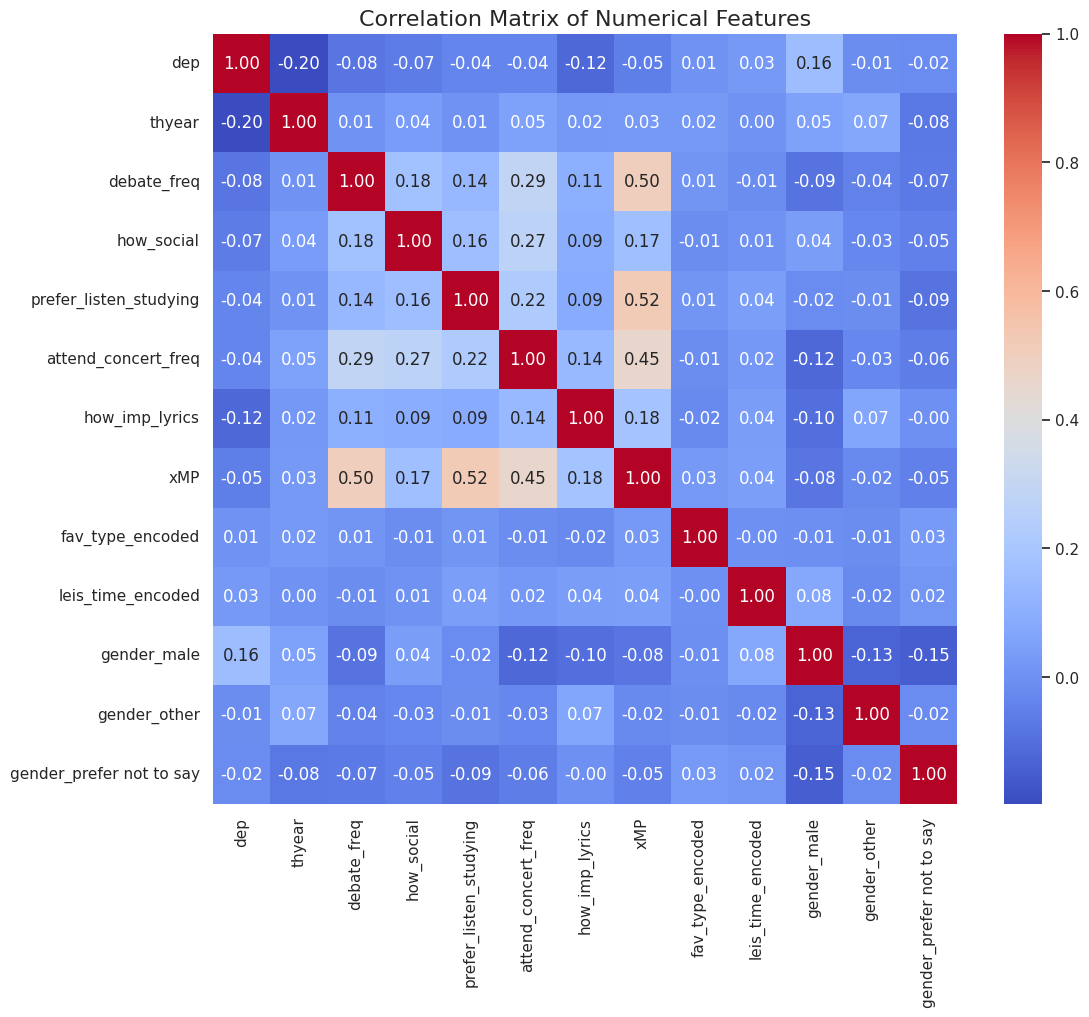

In [164]:
# new heatmap created because some variables are exploded

plt.figure(figsize=(12, 10))
correlation_matrix = df_ml.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [165]:
# randomforest is created

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# x and y are assigned
X = df_ml.drop('fav_type_encoded', axis=1)
y = df_ml['fav_type_encoded'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune hyperparameters
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy}")

# score was very bad hence forget every step in ML part, i gave up

Accuracy of Random Forest Classifier: 0.07641196013289037
